# Diabetes Prediction

Author: **Ntokozo Faithfully Miya**
<br>Date: **10 April 2024**
<br>Source: **https://www.kaggle.com/datasets/mrsimple07/diabetes-prediction/data**
<br>Github url: 

This document presents a comprehensive dataset aimed at predicting the likelihood of diabetes, incorporating a diverse range of features associated with diabetes risk factors. These features include variables such as blood sugar levels, body mass index (BMI), age, number of pregnancies an individual has had, skin thickness, insulin, diabetes pedigree function, blood pressure and other relevant health indicators. Each set of feature values is accompanied by a diagnosis label that indicates whether the individual has diabetes or not.

1. Glucose levels are measured in milligrams per deciliter and range from 30mg/dl to 161mg/dl. 
2. ⁠Blood pressure is measured in millimeters of mercury (mm Hg)
3. ⁠BMI ranges from 13 - 36. 
4. ⁠Diabetes Pedigree Function- a function that scores the probability of diabetes based on family history- has a range of 0.1 to 0.8
5. The Diagnosis, in the target variable, 0 represents healthy people, and 1 represents those with diabetes.



### 1. Reading the data and data overview

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import gmean

import warnings
warnings.filterwarnings('ignore')

In [58]:
data = pd.read_csv('Diabetes_prediction.csv')

In [59]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0


In [60]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
995,1,103.496355,41.059401,24.930299,43.675978,25.846062,0.455884,19.905419,0
996,1,60.714150,64.082842,24.689064,111.562745,19.464280,0.250560,44.421874,1
997,0,97.597727,64.122312,22.140339,108.138552,22.733052,0.761463,58.949800,1
998,0,66.775137,55.908797,24.885274,219.521484,31.819187,0.382877,46.928923,0
999,0,87.647268,69.111593,25.621266,134.335745,31.098746,0.605828,41.785889,1


#### Data Description

In [61]:
data.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,1.77,99.44,72.18,23.28,84.58,25.43,0.45,43.28,0.31
std,1.35,19.47,13.88,1.17,74.87,3.69,0.20,14.47,0.46
min,0.00,30.57,31.40,19.37,-165.31,13.55,0.10,-0.98,0.00
25%,1.00,86.15,62.80,22.50,35.08,23.02,0.28,33.52,0.00
50%,2.00,99.46,71.91,23.28,84.44,25.46,0.45,43.63,0.00
75%,3.00,113.26,82.08,24.05,134.27,27.97,0.62,53.10,1.00
max,8.00,161.24,110.72,26.92,317.70,36.32,0.80,90.57,1.00


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
 8   Diagnosis                 1000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 70.4 KB


In [63]:
data.nunique()

Pregnancies                    8
Glucose                     1000
BloodPressure               1000
SkinThickness               1000
Insulin                     1000
BMI                         1000
DiabetesPedigreeFunction    1000
Age                         1000
Diagnosis                      2
dtype: int64

In [64]:
data.shape

(1000, 9)

### 2. Cleaning the data

##### Checking for missing values.

In [65]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diagnosis                   0
dtype: int64

##### Checking for duplicate entries.

In [66]:
data[data.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis


##### Correcting data formats.

In [67]:
data['Age'] = data['Age'].astype(int)

In [68]:
# Confirmation
print(data['Age'].dtype)

int32


##### Checking for outliers in dataset.

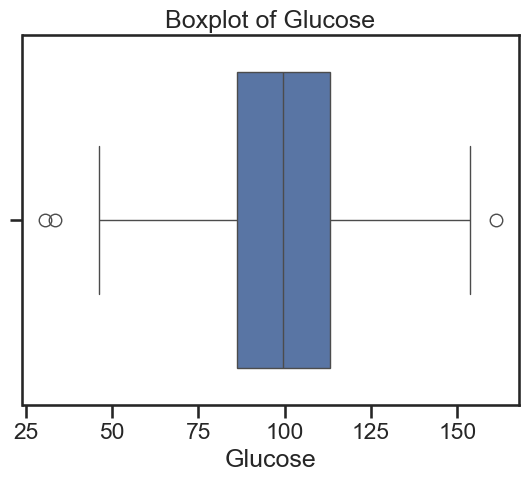

In [69]:
sns.boxplot(x=data['Glucose'], orient='h')
plt.xlabel('Glucose')
plt.title('Boxplot of Glucose') 
plt.show()

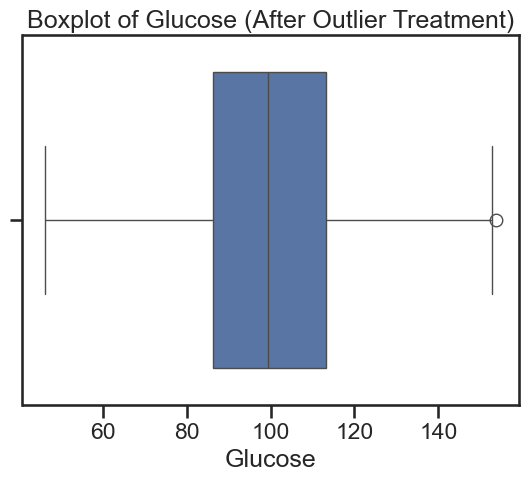

In [70]:
#Fixing outliers to ensure that the analysis accurately represents the underlying patterns in the data and improves the reliability of the results.
glucose_median = data['Glucose'].median()
from scipy import stats
z_scores = stats.zscore(data['Glucose'])

# Replacing the outliers with median
data.loc[np.abs(z_scores) > 3, 'Glucose'] = glucose_median

# After outlier treatment
sns.boxplot(x=data['Glucose'], orient='h')
plt.xlabel('Glucose')
plt.title('Boxplot of Glucose (After Outlier Treatment)')
plt.show()


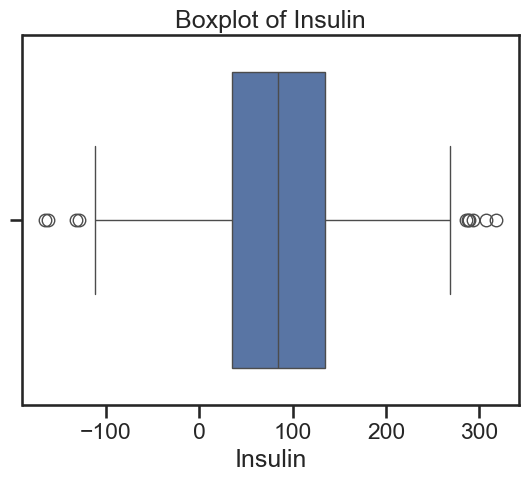

In [71]:
sns.boxplot(x=data['Insulin'], orient='h')
plt.xlabel('Insulin') 
plt.title('Boxplot of Insulin') 
plt.show()

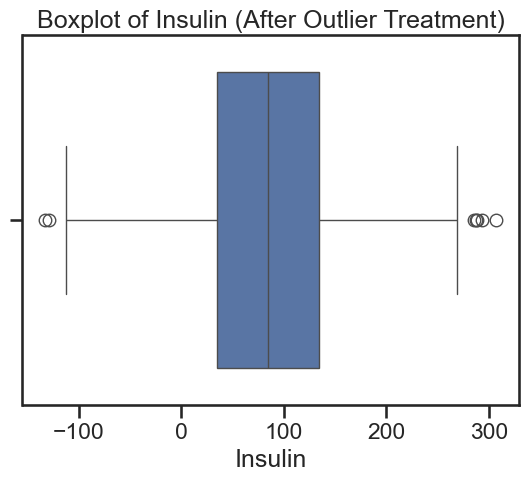

In [72]:
#Fixing outliers
insulin_median = data['Insulin'].median()
from scipy import stats
z_scores = stats.zscore(data['Insulin'])

# Replacing the outliers with median
data.loc[np.abs(z_scores) > 3, 'Insulin'] = insulin_median

# After outlier treatment
sns.boxplot(x=data['Insulin'], orient='h')
plt.xlabel('Insulin')
plt.title('Boxplot of Insulin (After Outlier Treatment)')
plt.show()


In [73]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32,0


In [74]:
data.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,1.77,99.51,72.18,23.28,84.85,25.43,0.45,42.79,0.31
std,1.35,19.14,13.88,1.17,73.67,3.69,0.20,14.46,0.46
min,0.00,46.30,31.40,19.37,-132.63,13.55,0.10,0.00,0.00
25%,1.00,86.22,62.80,22.50,35.38,23.02,0.28,33.00,0.00
50%,2.00,99.46,71.91,23.28,84.44,25.46,0.45,43.00,0.00
75%,3.00,113.14,82.08,24.05,134.16,27.97,0.62,53.00,1.00
max,8.00,153.69,110.72,26.92,307.06,36.32,0.80,90.00,1.00


### Imbalance SMOTE

##### A pie chart showing the distribution of healthy individuals and individuals with diabetes in the dataset.

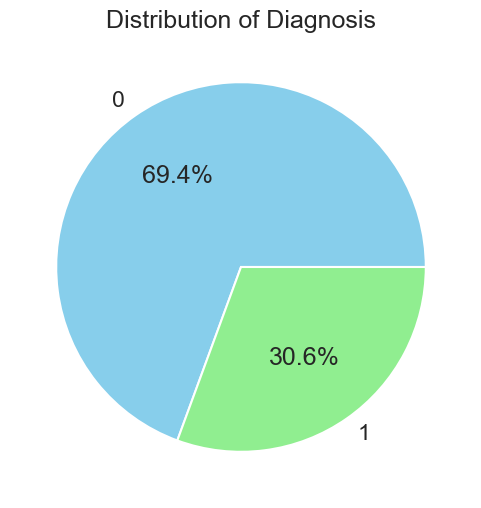

In [75]:
plt.figure(figsize=(6, 6))
data['Diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Diagnosis')
plt.ylabel('')
plt.show()

##### *By analyzing the pie chart above, it was observed that the dataset exhibits class imbalance, with the majority class accounting for 69.4% of the samples, while the minority class represents only 30.6%. This class imbalance can lead to biased model training and evaluation, affecting the overall performance metrics. To mitigate this issue, I will apply Synthetic Minority Over-sampling Technique (SMOTE) to generate synthetic samples for the minority class, balancing the dataset and improving the model's ability to generalize to unseen data.*

In [76]:
!pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 187.9 kB/s eta 0:00:57
   ---------------------------------------- 0.0/10.6 MB 164.3 kB/s eta 0:01:05
   ---------------------------------------- 0.1/10.6 MB 218.8 kB/s eta 0:00:49
   ---------------------------------------- 0.1/10.6 MB 309.1 kB/s eta 0:00:34
    --------------------------------------- 0.1/10.6 MB 405.9 kB/s eta 0:00:26
    --------------------------------------- 0.2/10.6 MB 491.5 kB/s eta 0:00:22
    --------------------------------------- 0.2/10.6 MB 554.9 kB/s eta 0:00:19
   - -------------------------------------- 0.3/10.6 MB 634.5 kB/s eta 0:00:17
   - -----

  You can safely remove it manually.


In [77]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [78]:
# Imbalance SMOTE 

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(data.drop(columns=['Diagnosis'], axis=1), data['Diagnosis'])

X_res['Diagnosis']= y_res

data = X_res.copy()

In [79]:
#balanced_data = pd.DataFrame(balanced_data) 
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32,0
...,...,...,...,...,...,...,...,...,...
1305,1,91.730980,66.962750,22.703829,154.767891,29.000765,0.402026,54,1
1306,2,89.075831,62.089842,22.713640,0.953340,22.863845,0.752259,36,1
1307,0,81.826291,62.344672,23.395714,121.553481,27.508042,0.374929,33,1
1308,1,103.864965,55.970823,23.407463,62.852983,24.285393,0.518722,60,1


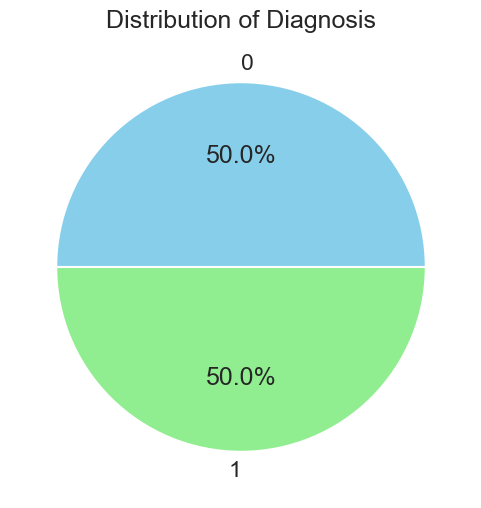

In [80]:
plt.figure(figsize=(6, 6))
data['Diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Diagnosis')
plt.ylabel('')
plt.show()

### 3. Descriptive Statistics

#### 3.1. Mean

In [81]:
# Calculating the mean

print('============= MEAN =============')
means = data.mean()  
dataframe = pd.DataFrame({'Mean': means}) 
 
dataframe

============= MEAN =============


,Mean
Pregnancies,1.662595
Glucose,98.997794
BloodPressure,71.656869
SkinThickness,23.294407
Insulin,88.141657
BMI,25.411607
DiabetesPedigreeFunction,0.450795
Age,41.856489
Diagnosis,0.500000


#### 3.2. Median

In [82]:
# Calculationg the median

print('============= MEDIAN =============')
medians = data.median()  
dataframe = pd.DataFrame({'Median': medians}) 
 
dataframe

============= MEDIAN =============


,Median
Pregnancies,2.000000
Glucose,99.062553
BloodPressure,70.913371
SkinThickness,23.283740
Insulin,88.529295
BMI,25.435186
DiabetesPedigreeFunction,0.447338
Age,42.000000
Diagnosis,0.500000


#### 3.3. Mode

In [83]:
# Calculating the mode

print('============== MODE ==============')
modes = data.apply(lambda x: x.value_counts().idxmax())
dataframe = pd.DataFrame({'Mode': modes})

dataframe


============== MODE ==============


,Mode
Pregnancies,1.000000
Glucose,99.458362
BloodPressure,56.410731
SkinThickness,24.336736
Insulin,84.442232
BMI,26.455940
DiabetesPedigreeFunction,0.272682
Age,36.000000
Diagnosis,0.000000


#### 3.4. Standard Deviation

In [84]:
# Calculating the standard deviation

print('========== STANDARD DEVIATION ==========')
stds = data.std()
dataframe = pd.DataFrame({'Standard Deviation': stds})

dataframe

========== STANDARD DEVIATION ==========


,Standard Deviation
Pregnancies,1.297841
Glucose,18.690000
BloodPressure,13.556289
SkinThickness,1.113371
Insulin,71.998686
BMI,3.567922
DiabetesPedigreeFunction,0.187170
Age,14.338722
Diagnosis,0.500191


#### 3.5. Standard Error

In [85]:
# Calculating the standard error

print('========== STANDARD ERROR ==========')
std_error = data.std()/np.sqrt(len(data))
dataframe = pd.DataFrame({'Standard Error': std_error})

dataframe

========== STANDARD ERROR ==========


,Standard Error
Pregnancies,0.035858
Glucose,0.516385
BloodPressure,0.374546
SkinThickness,0.030761
Insulin,1.989248
BMI,0.098578
DiabetesPedigreeFunction,0.005171
Age,0.396164
Diagnosis,0.013820


#### 3.6. Sample Variance

In [86]:
# Calculating the sample varience

print('========== SAMPLE VARIANCE ==========')
sample_var = np.var(data, ddof=1)  
dataframe = pd.DataFrame({'Sample Variance': sample_var})

dataframe

========== SAMPLE VARIANCE ==========


,Sample Variance
Pregnancies,1.684391
Glucose,349.316101
BloodPressure,183.772978
SkinThickness,1.239594
Insulin,5183.810793
BMI,12.730069
DiabetesPedigreeFunction,0.035033
Age,205.598946
Diagnosis,0.250191


#### 3.7. Kurtosis

In [87]:
# Calculating kurtosis

print('========== KURTOSIS ==========')
kurt = stats.kurtosis(data)
dataframe = pd.DataFrame({'Kurtosis': kurt}) 
 
dataframe

========== KURTOSIS ==========


,Kurtosis
0,0.341687
1,-0.415357
2,-0.083926
3,0.126476
4,-0.146802
5,-0.072733
6,-1.022208
7,-0.107969
8,-2.000000


#### 3.8. Skewness

In [88]:
# Calculating the skewness

print('========== SKEWNESS ==========')
skewness = stats.skew(data)
dataframe = pd.DataFrame({'Skewness': skewness}) 
 
dataframe

========== SKEWNESS ==========


,Skewness
0,0.699924
1,-0.003538
2,0.065724
3,0.045654
4,-0.012423
5,-0.072418
6,-0.000395
7,-0.018698
8,0.000000


#### 3.9. Range 

In [89]:
# Calculating the range

print('============= RANGE =============')
ranges = data.max() - data.min()
dataframe = pd.DataFrame({'Range': ranges}) 
 
dataframe

============= RANGE =============


,Range
Pregnancies,8.000000
Glucose,107.389246
BloodPressure,79.322228
SkinThickness,7.547667
Insulin,419.292321
BMI,22.775780
DiabetesPedigreeFunction,0.699617
Age,90.000000
Diagnosis,1.000000


#### 3.10. Z-Score Of Each Value

In [90]:
# Calculating the z-score of each value

print('================================= Z-SCORES ==================================')
mean = data.mean()
std_dev = data.std()
z_scores = (data - mean)/std_dev

dataframe = pd.DataFrame(z_scores), round(2)
dataframe

================================= Z-SCORES ==================================


(      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
 0        0.259974  0.902386      -1.124654       0.936192  0.086726  0.292701   
 1        0.259974 -0.348190      -0.076817       0.133993  0.701551 -0.420817   
 2       -0.510537 -0.580863      -0.619214       0.098761  0.850244 -0.970693   
 3        0.259974  0.505902      -0.284977      -2.283899  0.286255 -0.336976   
 4       -0.510537  1.543694       1.701706      -0.620933 -0.873234  2.126131   
 ...           ...       ...            ...            ...       ...       ...   
 1305    -0.510537 -0.388808      -0.346269      -0.530441  0.925381  1.005952   
 1306     0.259974 -0.530870      -0.705726      -0.521629 -1.210971 -0.714074   
 1307    -1.281047 -0.918754      -0.686928       0.090992  0.464062  0.587579   
 1308    -0.510537  0.260416      -1.157105       0.101544 -0.351238 -0.315650   
 1309    -0.510537 -1.083161      -0.700769      -0.516671 -1.110892 -0.061816   
 
       Diabete

#### 3.11. Sum & Count 

In [91]:
# Calculating the sum and count 

print('=============== SUM & COUNT ===============')
sum_ = data.sum()
count_ = len(data)
dataframe = pd.DataFrame({'Sum': sum_, 'Count':count_}) 
 
dataframe

=============== SUM & COUNT ===============


,Sum,Count
Pregnancies,2178.000000,1310
Glucose,129687.110374,1310
BloodPressure,93870.497751,1310
SkinThickness,30515.673027,1310
Insulin,115465.570151,1310
BMI,33289.205561,1310
DiabetesPedigreeFunction,590.541826,1310
Age,54832.000000,1310
Diagnosis,655.000000,1310


#### 3.12. Coefficient of Variation

In [92]:
# Calculating the coefficient of variation which is calculated by dividing the standard deviation by the mean (CV = SD/mean)

print('========== COEFFICIENT OF VARIATION ==========')
mean = data.mean()
std_dev = data.std()

CV = std_dev / mean
perc_ = (std_dev / mean) * 100
dataframe = pd.DataFrame({'CV': CV, 'Percentage': perc_}) 
 
dataframe

========== COEFFICIENT OF VARIATION ==========


,CV,Percentage
Pregnancies,0.780611,78.061126
Glucose,0.188792,18.879209
BloodPressure,0.189183,18.918339
SkinThickness,0.047796,4.779563
Insulin,0.816852,81.685197
BMI,0.140405,14.040522
DiabetesPedigreeFunction,0.415200,41.520043
Age,0.342569,34.256868
Diagnosis,1.000382,100.038190


### 4. More Descriptive Statistics

#### 4.1. Geometric Mean

In [93]:
# This is a measurement of central tendency that represents the central or typical value of a dataset. 

# Calculating the geometric mean

print('========== GEOMETRIC MEAN ==========')
geometric_mean = gmean(data)
dataframe = pd.DataFrame({'Geometric Mean': geometric_mean}) 
 
dataframe

========== GEOMETRIC MEAN ==========


,Geometric Mean
0,0.000000
1,97.161452
2,70.324124
3,23.267778
4,NaN
5,25.152998
6,0.404760
7,0.000000
8,0.000000


#### 4.2. Quartiles

In [94]:
# Calculating the quartiles of the dataset

Q1 = data.quantile(0.25)
Q2 = data.quantile(0.50)
Q3 = data.quantile(0.75)

print('==============================================')
print('FIRST QUARTILE(Q1) OF THE DATASET')
print('==============================================')
dataframe1 = pd.DataFrame({'First quartile': Q1}) 
print(dataframe1)
print('==============================================')
print('SECOND QUARTILE(Q2) OF THE DATASET ')
print('==============================================')
dataframe2 = pd.DataFrame({'Second quartile': Q2}) 
print(dataframe2)
print('==============================================')
print('THIRD QUARTILE(Q3) OF THE DATASET')
print('==============================================')
dataframe3 = pd.DataFrame({'Third quartile': Q3}) 
print(dataframe3)

FIRST QUARTILE(Q1) OF THE DATASET
                          First quartile
Pregnancies                     1.000000
Glucose                        85.699168
BloodPressure                  62.535416
SkinThickness                  22.551018
Insulin                        39.025700
BMI                            23.088306
DiabetesPedigreeFunction        0.302428
Age                            32.000000
Diagnosis                       0.000000
SECOND QUARTILE(Q2) OF THE DATASET 
                          Second quartile
Pregnancies                      2.000000
Glucose                         99.062553
BloodPressure                   70.913371
SkinThickness                   23.283740
Insulin                         88.529295
BMI                             25.435186
DiabetesPedigreeFunction         0.447338
Age                             42.000000
Diagnosis                        0.500000
THIRD QUARTILE(Q3) OF THE DATASET
                          Third quartile
Pregnancies              

#### 4.3. Chebyshev's Theorem

In [95]:
# Calculating the mean and standard deviation

mean = data.mean()
std_dev = data.std()

k = 2  

proportion_within_k_std = 1 - 1 / k**2
print(f"According to Chebyshev's theorem, at least {proportion_within_k_std:.2%} of the data values will lie within{k}standard deviations of the mean.")

According to Chebyshev's theorem, at least 75.00% of the data values will lie within2standard deviations of the mean.


#### 4.4. Five Number Summary

In [96]:
# Lets do the five-number summary of the dataset which includes the min, max and all three quartile values.

min_values = data.min()
Q1 = data.quantile(0.25)
median = data.median()
Q3 = data.quantile(0.75)
max_values = data.max()
print('============ FIVE-NUMBER SUMMARY =============')
print('')
print('==============================================')
print('MIN VALUES OF THE DATASET')
print('==============================================')
print(min_values)
print('==============================================')
print('Q1 VALUES OF THE DATASET')
print('==============================================')
print(Q1)
print('==============================================')
print('MEDIAN VALUES OF THE DATASET')
print('==============================================')
print(median)
print('==============================================')
print('Q3 VALUES OF THE DATASET')
print('==============================================')
print(Q3)
print('==============================================')
print('MAX VALUES OF THE DATASET')
print('==============================================')
print(max_values)

============ FIVE-NUMBER SUMMARY =============

MIN VALUES OF THE DATASET
Pregnancies                   0.000000
Glucose                      46.304239
BloodPressure                31.401487
SkinThickness                19.369987
Insulin                    -112.228137
BMI                          13.548818
DiabetesPedigreeFunction      0.100037
Age                           0.000000
Diagnosis                     0.000000
dtype: float64
Q1 VALUES OF THE DATASET
Pregnancies                  1.000000
Glucose                     85.699168
BloodPressure               62.535416
SkinThickness               22.551018
Insulin                     39.025700
BMI                         23.088306
DiabetesPedigreeFunction     0.302428
Age                         32.000000
Diagnosis                    0.000000
Name: 0.25, dtype: float64
MEDIAN VALUES OF THE DATASET
Pregnancies                  2.000000
Glucose                     99.062553
BloodPressure               70.913371
SkinThickness          

#### 4.5. Sum of Squares

In [97]:
# Lets calculate the sum of squares

# The sum of squares (SS) measures the total variability of data points around the mean. 
# It quantifies how much each data point deviates from the dataset's mean value. 
# It provides valuable insights into the dispersion and distribution of data.


mean = data.mean()
deviations = data - mean

squared_deviations = deviations**2
sum_of_squares = squared_deviations.sum()

print("============ SUM OF SQUARES ============")
dataframe = pd.DataFrame({'Sum Of Squares': sum_of_squares})
dataframe

============ SUM OF SQUARES ============


,Sum Of Squares
Pregnancies,2.204867e+03
Glucose,4.572548e+05
BloodPressure,2.405588e+05
SkinThickness,1.622629e+03
Insulin,6.785608e+06
BMI,1.666366e+04
DiabetesPedigreeFunction,4.585788e+01
Age,2.691290e+05
Diagnosis,3.275000e+02


### 5. Data Analysis with visualization 

#### 5.1. Histogram

##### A histogram showing the distribution of the diabetes pedigree function scores for healthy individuals and those with diabetes, providing insights into the role of family history in diabetes risk.

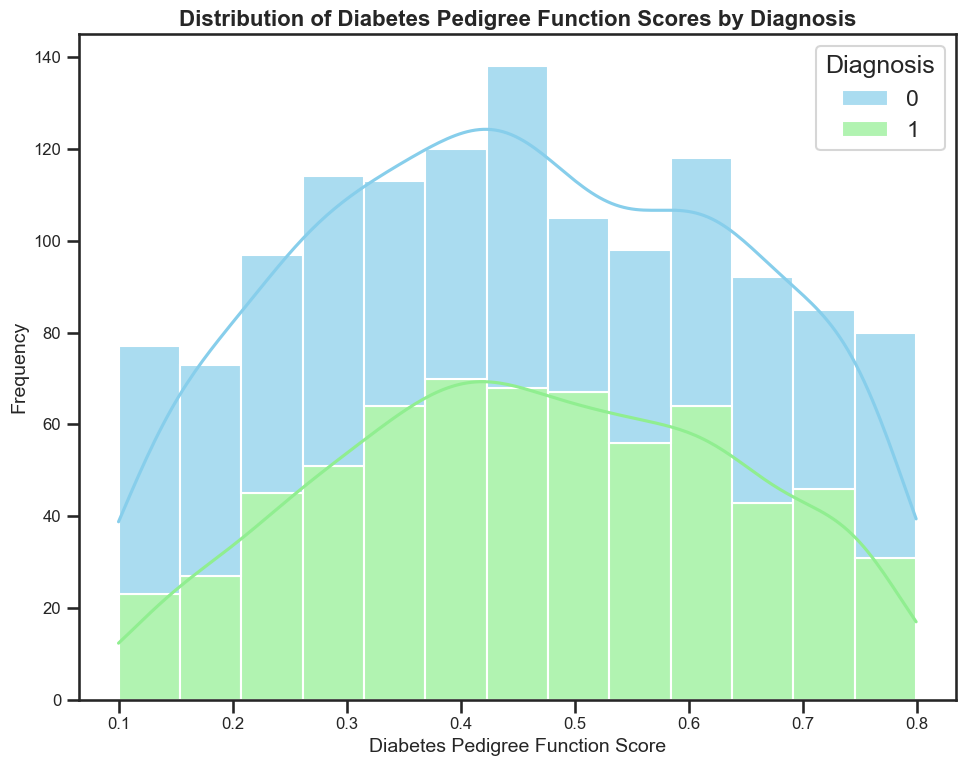

In [98]:
plt.figure(figsize=(10, 8))
sns.histplot(data, x='DiabetesPedigreeFunction', hue='Diagnosis', multiple='stack', kde=True, palette=['skyblue', 'lightgreen'], alpha=0.7)
plt.title('Distribution of Diabetes Pedigree Function Scores by Diagnosis', fontsize=16, fontweight='bold')
plt.xlabel('Diabetes Pedigree Function Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

##### The analysis of the histogram shows a clear difference in the distribution of diabetes pedigree function scores between healthy individuals and those with diabetes. This suggests a possible link between family history and the risk of diabetes. It highlights the importance of genetic predisposition in diabetes and suggests the need to take family history into account when assessing an individual’s risk for the disease.

#### 5.2. Stacked Area Chart

##### A stacked area chart illustrating the contribution of glucose, insulin, and BMI to the diagnosis of diabetes.

<Figure size 800x600 with 0 Axes>

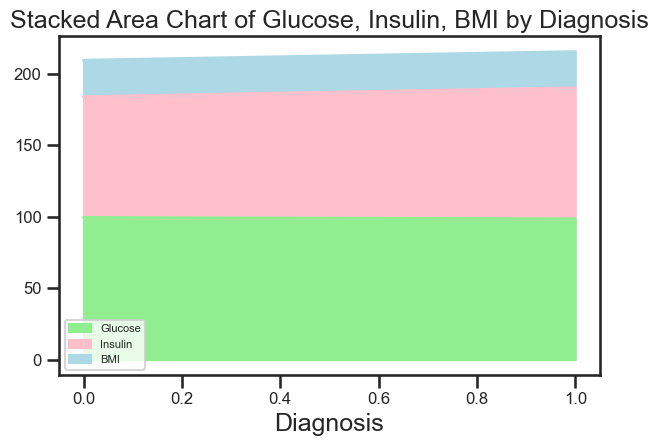

In [99]:
plt.figure(figsize=(8, 6))
data.groupby('Diagnosis')[['Glucose', 'Insulin', 'BMI']].mean().plot(kind='area', stacked=True, color=['lightgreen', 'pink', 'lightblue'])
plt.title('Stacked Area Chart of Glucose, Insulin, BMI by Diagnosis')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

##### The stacked area chart demonstrates that glucose and insulin levels play the most significant role in diagnosing diabetes, as indicated by the larger contribution compared to BMI. This visual highlights the hierarchical importance of these factors in determining the presence of diabetes, with glucose and insulin being the most influential.

#### 5.3. Clustered Bar Chart

##### A clustered bar chart comparing the average blood pressure values for healthy individuals and individuals with diabetes. This visualization helps with understanding the differences in blood pressure levels between the two groups.

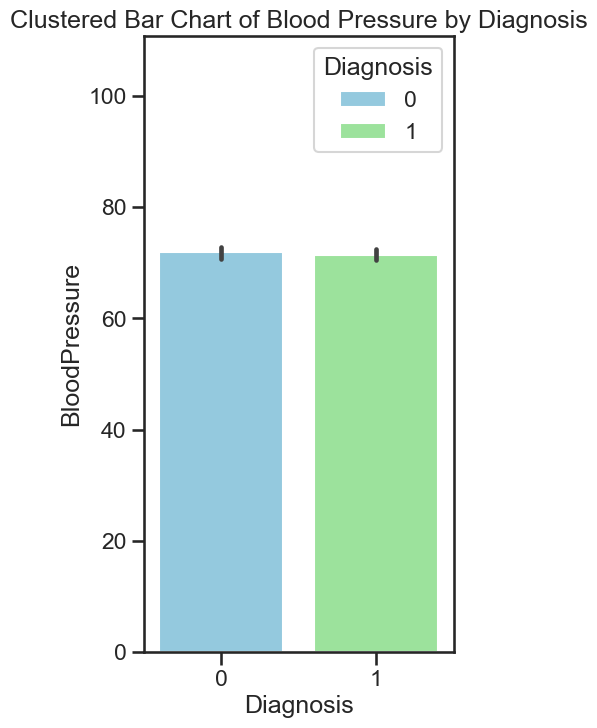

In [100]:
plt.figure(figsize=(4, 8))
sns.barplot(x='Diagnosis', y='BloodPressure', data=data, hue='Diagnosis', palette=['skyblue', 'lightgreen'])
plt.title('Clustered Bar Chart of Blood Pressure by Diagnosis')
plt.ylim(0, data['BloodPressure'].max())
plt.show()

##### This visualization suggests that blood pressure levels may not significantly differ between individuals with diabetes and healthy individuals, indicating that blood pressure alone may not directly cause diabetes.

#### 5.4. Box Plot

##### These are box plots comparing the distribution of ages between healthy individuals and those with diabetes to highlight any age-related patterns in the dataset.

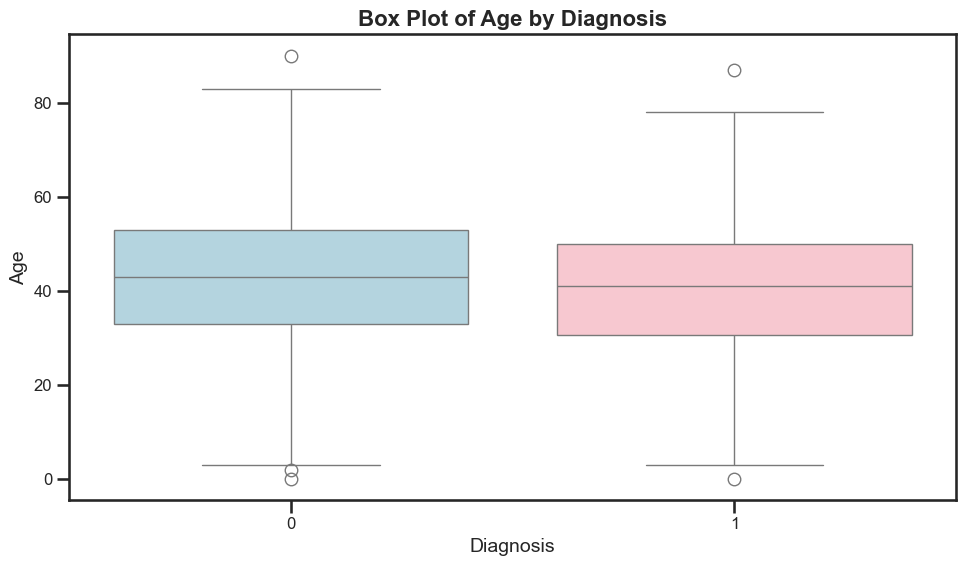

In [101]:
plt.figure(figsize=(10, 6))
colors = ['lightblue', 'pink']
sns.boxplot(x='Diagnosis', y='Age', data=data, palette=colors)
plt.title('Box Plot of Age by Diagnosis', fontsize=16, fontweight='bold')
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

##### The box plots comparing the distribution of ages between healthy individuals and those with diabetes reveal no significant difference in age between the two groups. This suggests that age alone may not be a determining factor for the onset of diabetes. Instead, it implies that diabetes is influenced by a combination of factors beyond age.

#### 5.5. Seaborn Countplot

##### This countplot effectively illustrates the distribution of diagnosis across different age groups, providing a clear visual representation of how age influences the frequency of diagnoses of diabetes.

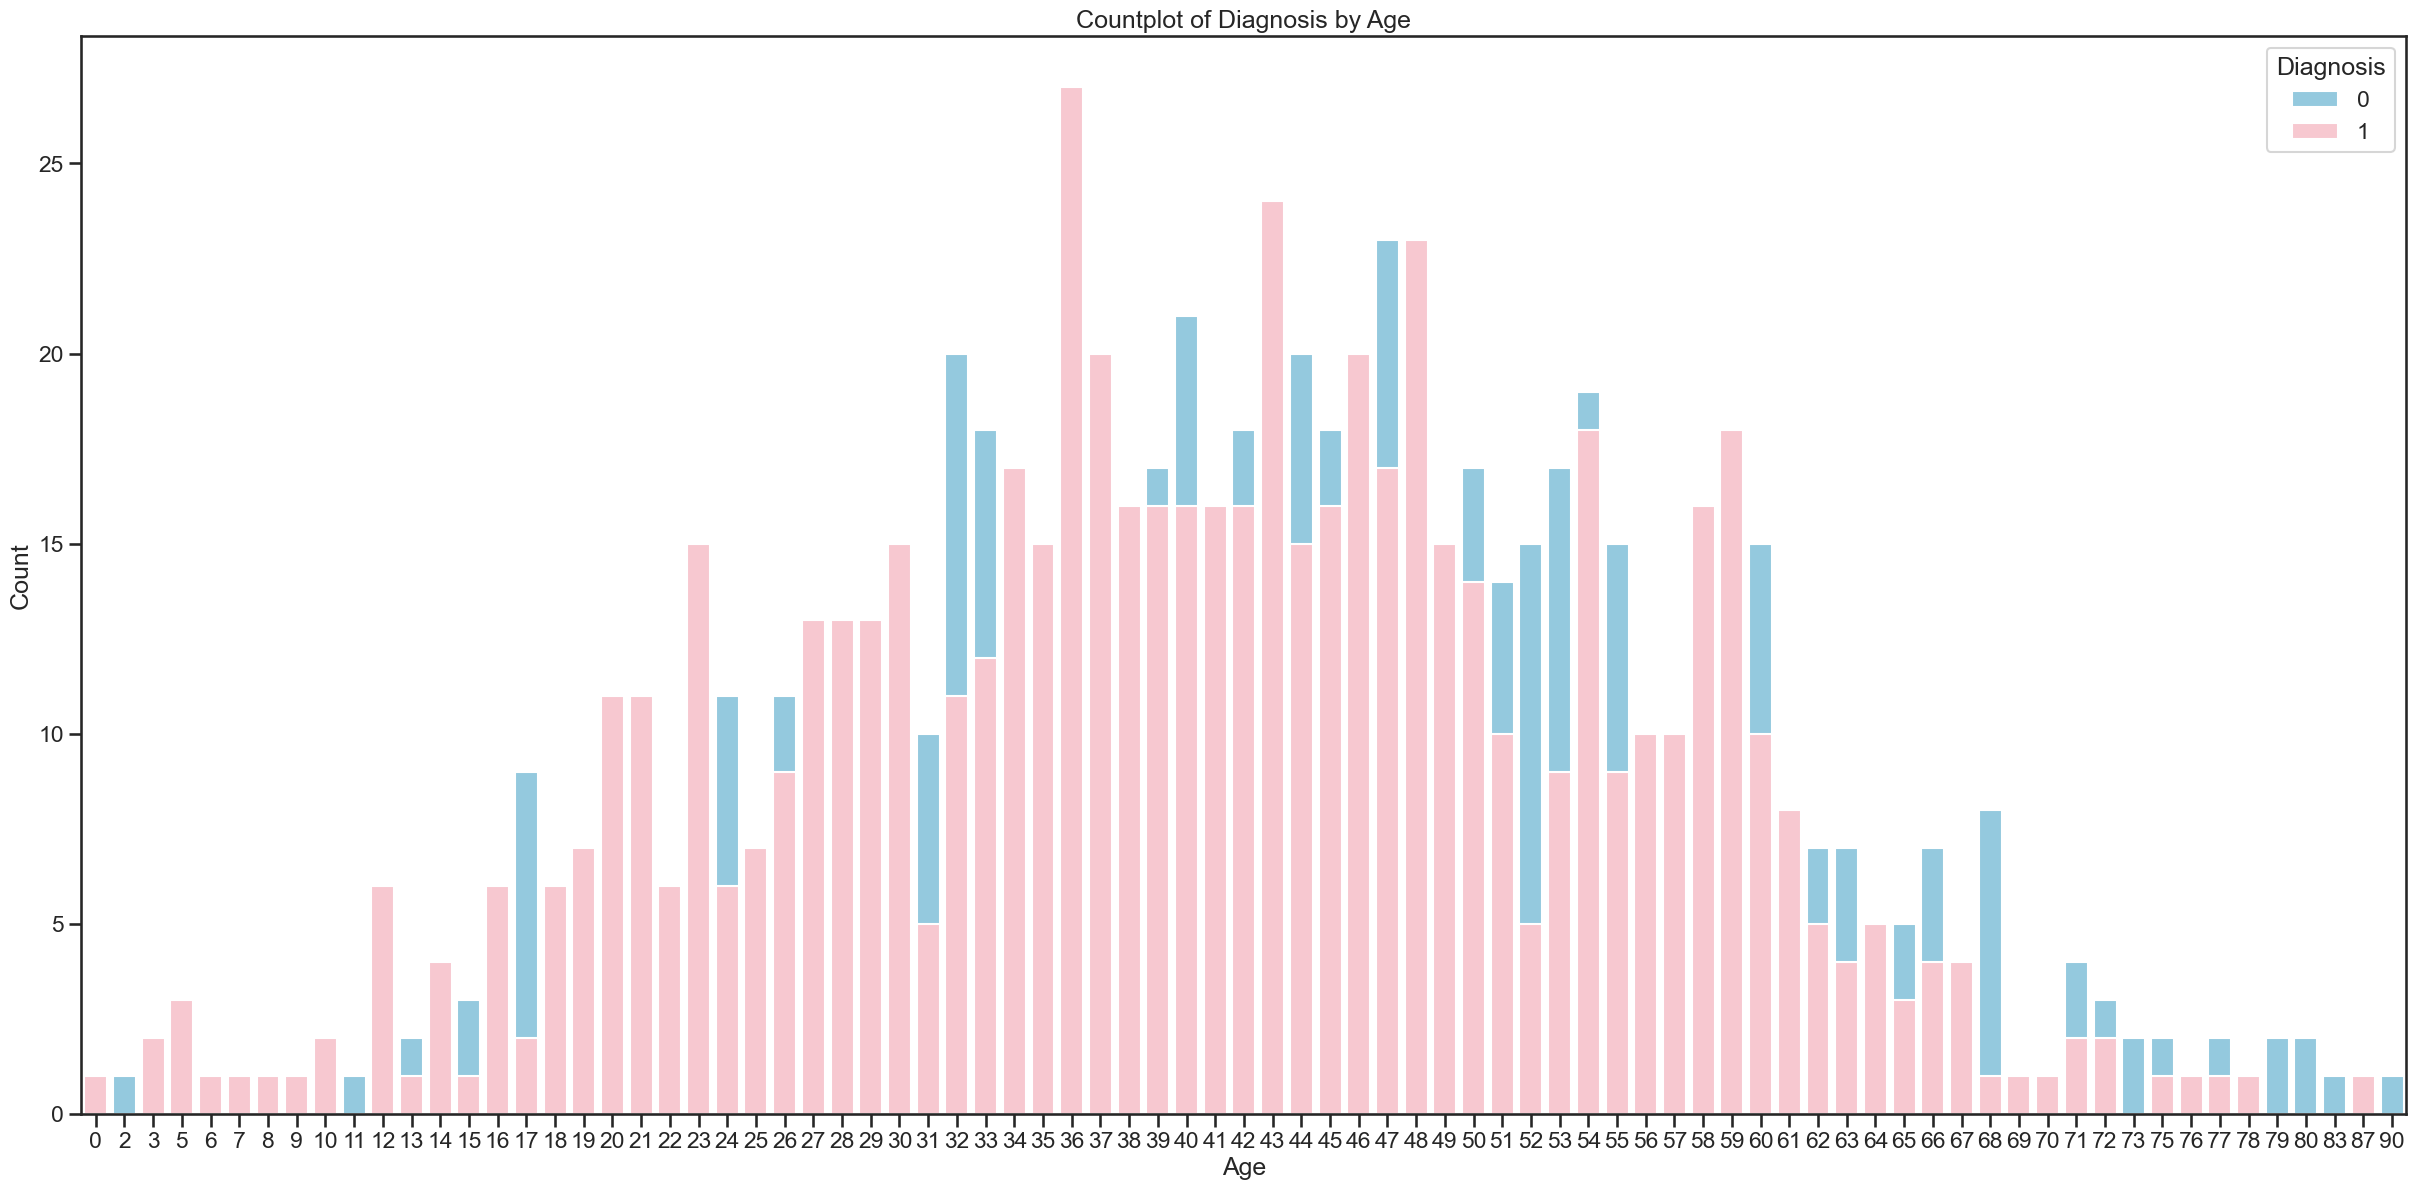

In [102]:
plt.figure(figsize=(30, 14))
sns.countplot(x='Age', hue='Diagnosis', data=data, palette=['skyblue', 'pink'], dodge=False)
plt.title('Countplot of Diagnosis by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Diagnosis', loc='upper right')
plt.show()

#### 5.6. Violin Plot

##### This is a violin plot combining the features of a box plot and a kernel density plot to show the distribution of glucose levels for healthy individuals and those with diabetes.

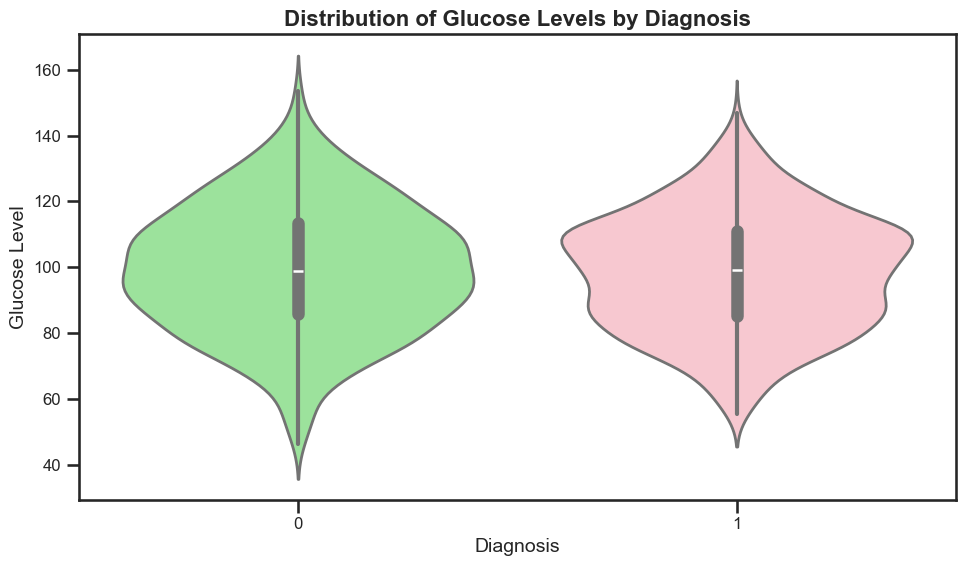

In [103]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Diagnosis', y='Glucose', data=data, palette=['lightgreen', 'pink'], linewidth=2)
plt.title('Distribution of Glucose Levels by Diagnosis', fontsize=16, fontweight='bold')
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Glucose Level', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#### 5.7. Scatter Plot Matrix

##### This scatter plot matrix displays multiple scatter plots at once, allowing for a visual examination of relationships between these key variables and how they relate to age.

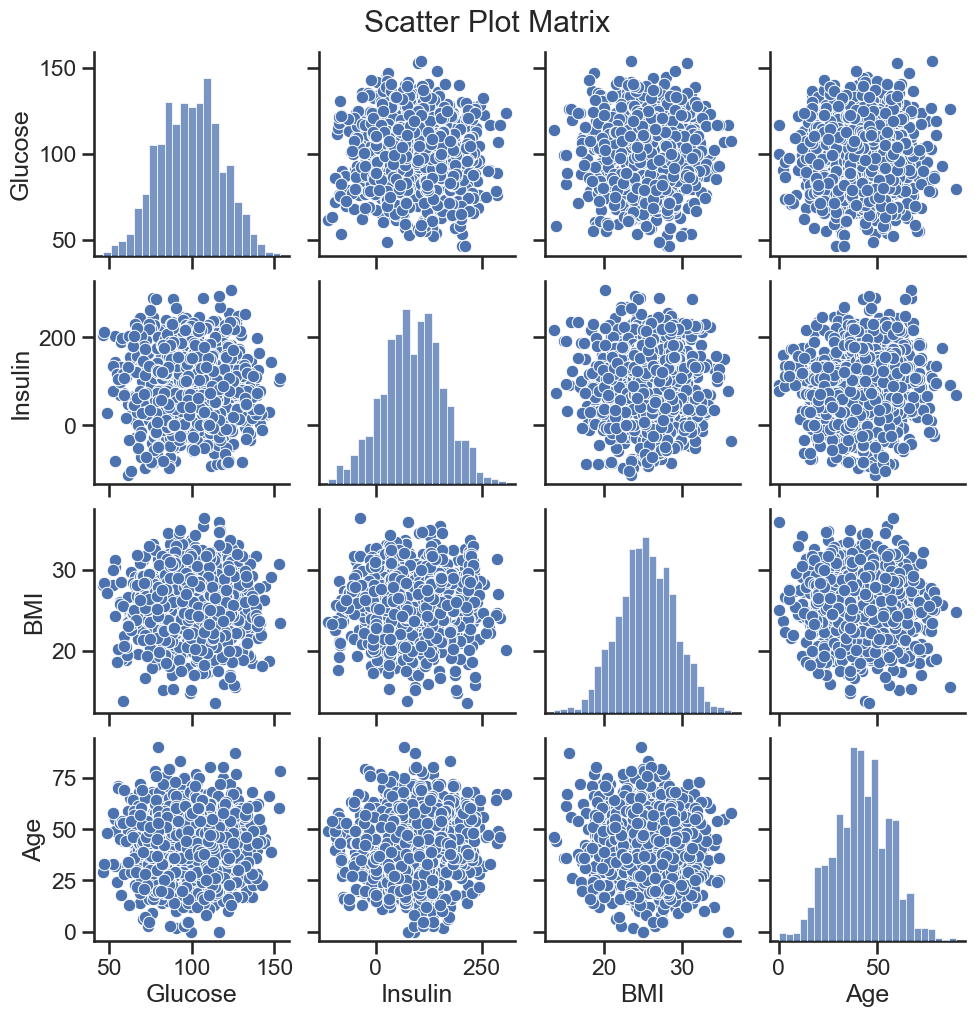

In [104]:
variables_of_interest = ['Glucose', 'Insulin', 'BMI', 'Age']
data_subset = data[variables_of_interest]
sns.pairplot(data_subset, palette='Blues')
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

####  5.8. Pairplot

##### This is a pairplot providing a visual overview of the relationships between pairs of variables to assess potential patterns or trends in the dataset.

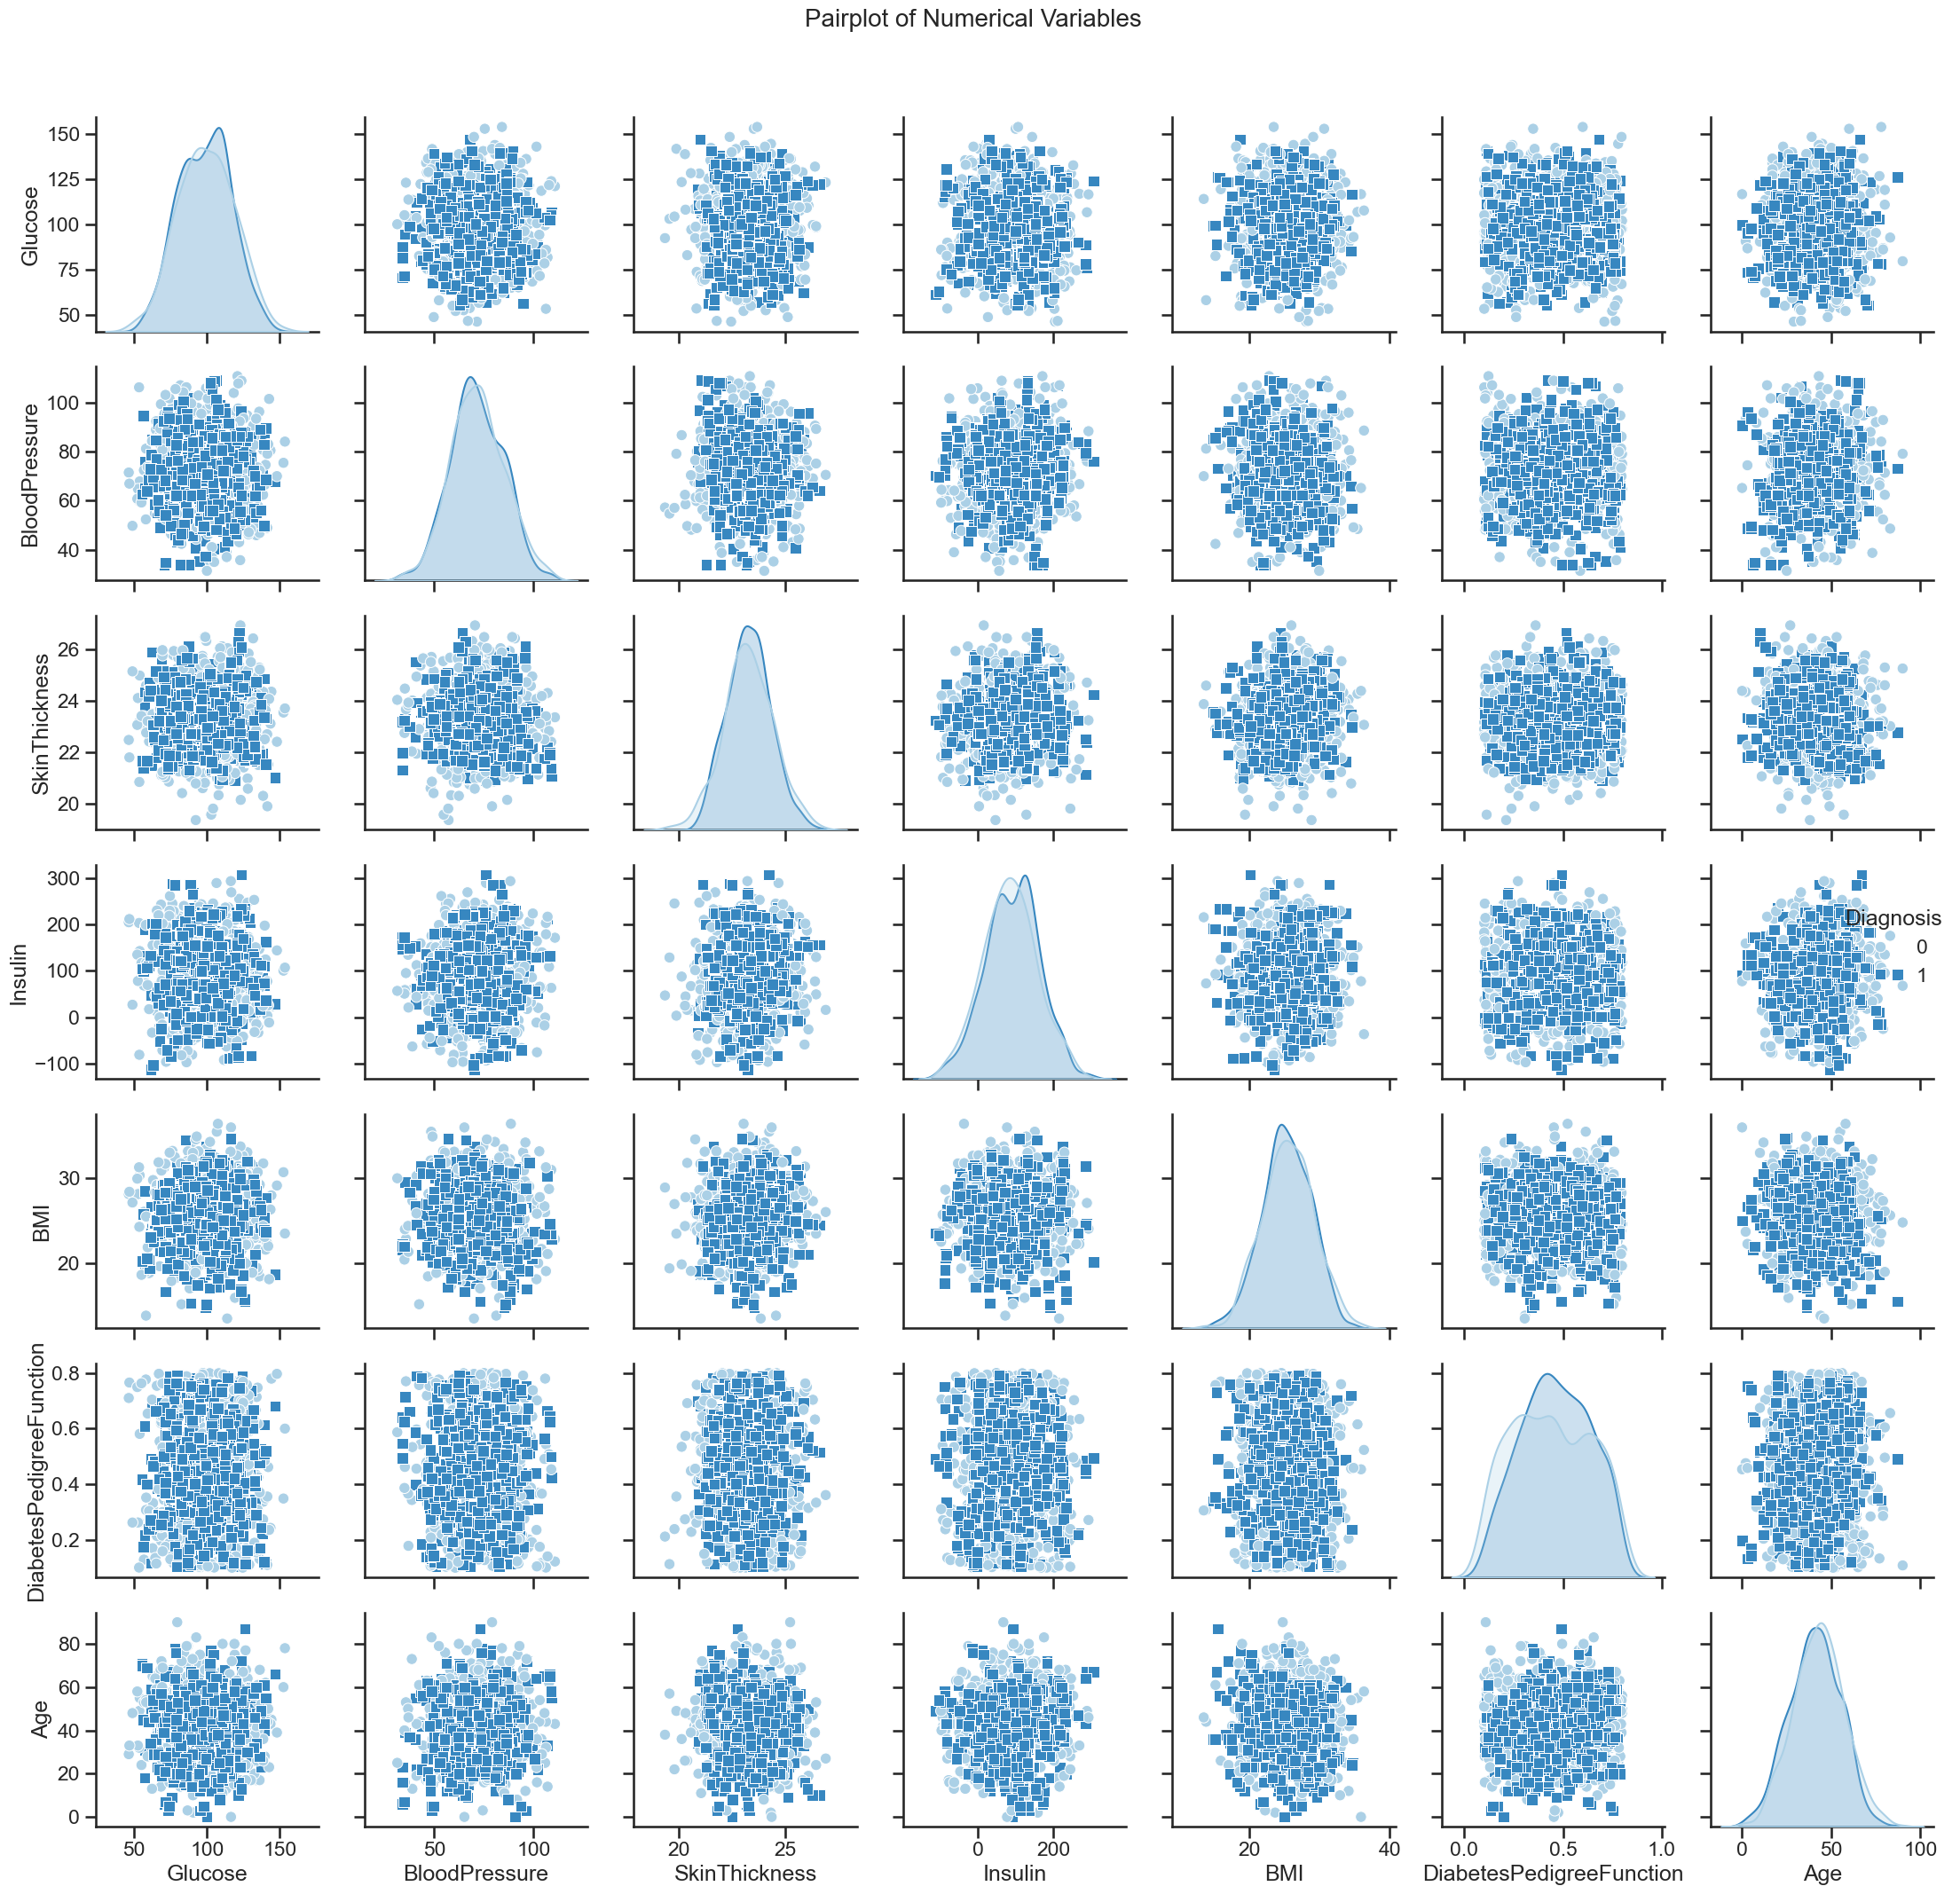

In [105]:
numerical_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diagnosis']

sns.set(style="ticks", context="talk")
pair_plot = sns.pairplot(data[numerical_columns], diag_kind='kde', hue='Diagnosis', palette='Blues', markers=["o", "s"], height=3, aspect=1)

pair_plot.fig.suptitle('Pairplot of Numerical Variables', y=1.02, fontsize=20)
pair_plot.fig.tight_layout()
plt.show()

#### 5.9. Correlation Matrix

#####  A correlation matrix revealing relationships between all variables, helping identify which factors are most strongly correlated with each other and with the diagnosis of diabetes.

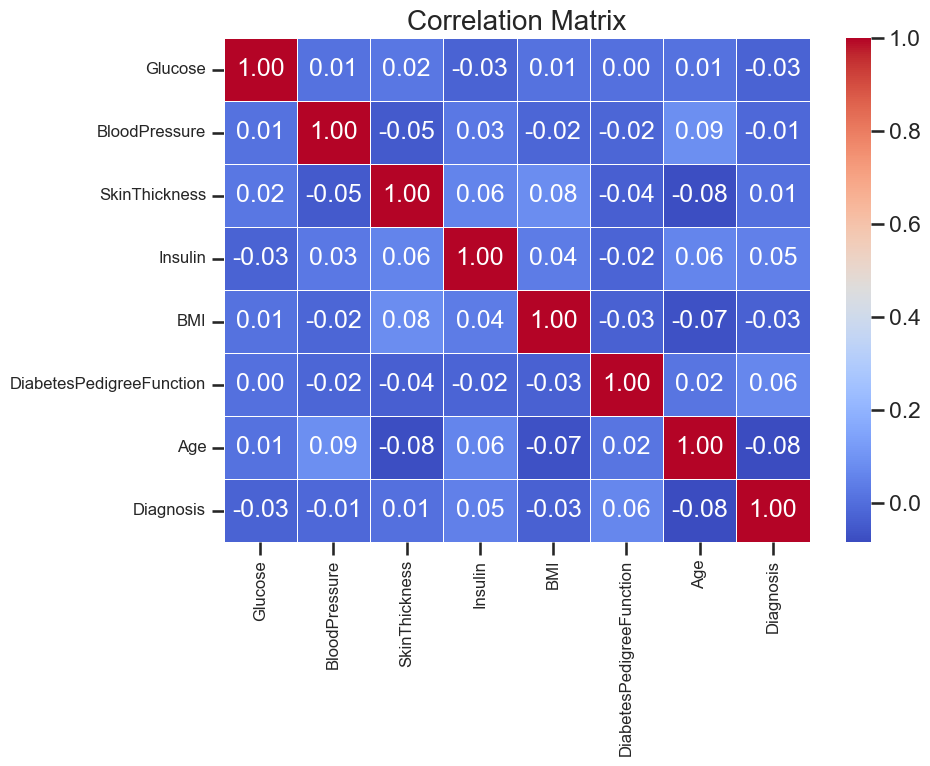

In [106]:
numerical_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diagnosis']

correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(10, 8))


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.grid(color='lightblue', linestyle='--', linewidth=0.5)
plt.show()

#### 5.10. Regression Analysis

##### Conducting logistic regression to help predict the likelihood of diabetes based on the other variables in the dataset, providing insights into the factors that influence diabetes risk.

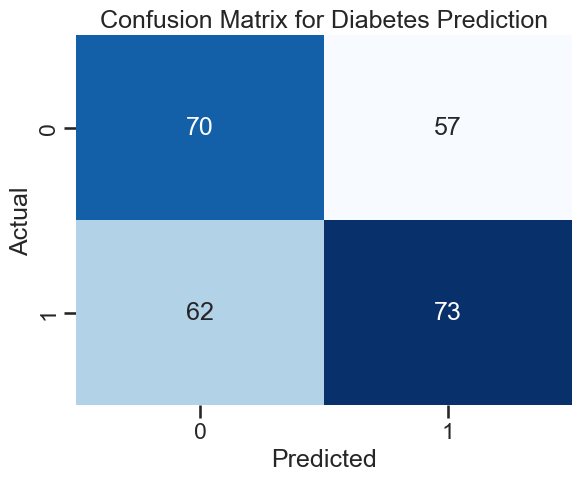

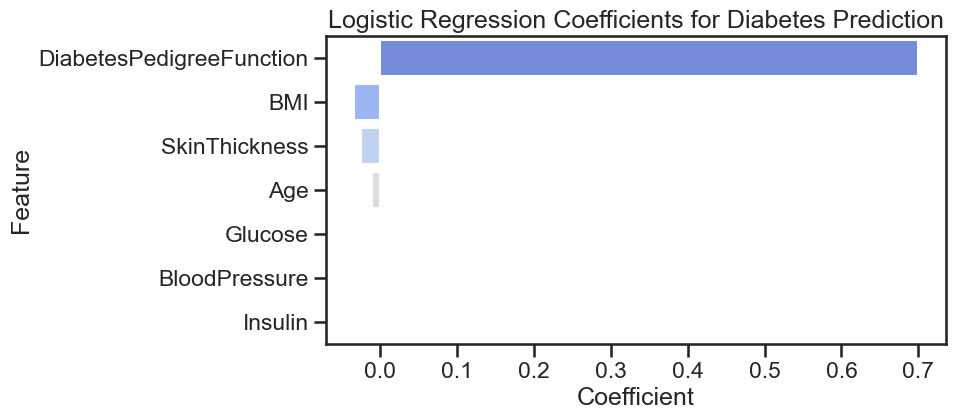

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Assuming 'data' is your DataFrame containing the dataset

features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
            'BMI', 'DiabetesPedigreeFunction', 'Age']
target = 'Diagnosis'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Diabetes Prediction')
plt.show()

coefficients = log_reg.coef_[0]
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()

coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients for Diabetes Prediction')
plt.show()

##### The logistic regression analysis provides valuable insights into the factors influencing diabetes risk. While the Diabetes Pedigree Function emerges as a significant predictor, Glucose, Blood Pressure, and Insulin exhibit minimal impact on diabetes risk in this context. Other variables such as BMI, Skin Thickness, and Age are not determining factors of diabetes.

### Reflection

The pair of assignments provided a valuable contrast between the capabilities of Excel and Python for data analysis. From Assignment 1, centered on Excel, I realized the critical importance of strengthening my Excel proficiency, especially considering my career aspirations in IT Audit. This assignment served as a wake-up call regarding my Excel proficiency which is vital for analyzing data in auditing. Additionally, I faced technical difficulties when dealing with large data sets, which highlighted Excel’s shortcomings when compared to Python. Witnessing my laptop struggle to process a massive dataset highlighted the impracticality of Excel for extensive data analysis tasks.
In contrast, Assignment 2, which centered on Python, provided a new outlook on data analysis that I found to be both liberating and gratifying, especially in the realm of visualization. The adaptability of Python and its comprehensive libraries, like pandas and matplotlib, made it possible to manage large datasets with ease and produce meaningful visualizations. This project highlighted Python’s capacity to tackle a wide array of data analysis challenges, showcasing its advantages over Excel when it comes to intricate analysis and visualization projects. For complex data analysis and large datasets, Python is the clear winner.  This assignment ignited a genuine interest in Python and its potential in the realm of data analysis.

What i learnt about both is that Excel is user-friendly and commonly used for basic data manipulation, visualization, and analysis. However, its performance tends to degrade with large datasets, making it less practical for handling substantial data volumes efficiently. These skills remain valuable for tasks like data entry, basic calculations, and simple visualizations. On the other hand, Python excels in handling big data due to its robust libraries like pandas, numpy, and scikit-learn, offering faster and more flexible data processing capabilities. Python also provides extensive visualization options through libraries like matplotlib and seaborn, facilitating the creation of sophisticated plots and graphs.

Looking back, I acknowledge that I could have tackled the initial assignment with greater care and in-depth investigation. A more committed approach to comprehending the data set and considering different analysis techniques could have led to better results. Nonetheless, working with Python was a great experience, particularly the aspect of creating visualizations. Python’s capacity for flexible and diverse data analysis and visualization made a lasting impression, inspiring me to enhance my proficiency in these areas.

While I I have some familiarity with Python, I see the potential for growth, especially in utilizing its sophisticated features and libraries for data analysis. Moreover, a deeper grasp of statistical principles and methods would improve my ability to extract significant conclusions from data and make well-informed choices. Focusing on these areas for improvement will be vital as I advance in my journey towards a profession in data analysis and IT Audit.